# <font color='Blue'>Task 1</font>
We have derived the formula of Linear Model, here I want to write codes for it by hand. The specific task is to predict sales based on radios shown as the table below. 
The original problem is from https://ml-cheatsheet.readthedocs.io/en/latest/linear_regression.html


| Company | Radio($) | Sales |
| --- | --- | --- |
|Amazon | 37.8 | 22.1 |
| Google | 39.3 | 10.4 |

# Generate data

In [67]:
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
sample_size = 200
np.random.seed(5)
radio_sample = 60 * np.random.rand(sample_size)
weight_truth = 0.4
bias_truth = -3
np.random.seed(10)
nosie_sample = 10 * (np.random.normal(0, 0.1, sample_size))
sales_sample = radio_sample * weight_truth + bias_truth + nosie_sample
sales_no_noise = radio_sample * weight_truth + bias_truth

Text(0, 0.5, 'sales')

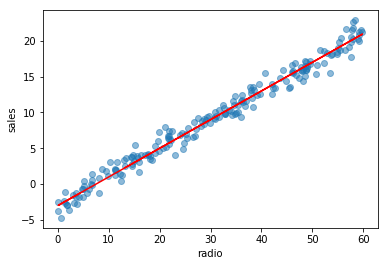

In [118]:
plt.scatter(radio_sample, sales_sample, alpha=0.5)
plt.plot(radio_sample, sales_no_noise, c="r")
plt.xlabel("radio")
plt.ylabel("sales")

# Cost function

$f(m, b)=\frac{1}{N} \sum_{i=1}^{n}\left(y_{i}-\left(m x_{i}+b\right)\right)^{2}$

In [71]:
def cost_function(radio, sales, weight, bias):
    '''cost_function for linear model
    Args: 
        radio,sales: is numpy array
        weight,bias: is scalar
    '''
    sample_size = len(radio)
    error = 0.0
    for i in range(sample_size):
        error += (sales[i] - (radio[i]*weight + bias))**2
    error_avg = error/sample_size
    return error_avg

# Gradient descent

\begin{aligned} f^{\prime}(m, b)=\left[ \begin{array}{c}{\frac{d f}{d m}} \\ {\frac{d f}{d b}}\end{array}\right] &=\left[ \begin{array}{c}{\frac{1}{N} \sum-2 x_{i}\left(y_{i}-\left(m x_{i}+b\right)\right)} \\ {\frac{1}{N} \sum-2\left(y_{i}-\left(m x_{i}+b\right)\right)}\end{array}\right] \end{aligned}

In [97]:
def update_weight(radio, sales, weight, bias, learning_rate):
    # initial value
    weight_deriv = 0
    bias_deriv = 0
    sample_size = len(radio)
    
    for i in range(sample_size):
        # calculate partial derivatives
        weight_deriv += -2*radio[i]*(sales[i] - (weight*radio[i] + bias))
        bias_deriv += -2*(sales[i] - (weight*radio[i] + bias))
    
    #gradient descent
    weight = weight - (weight_deriv/sample_size)*learning_rate
    bias = bias - (bias_deriv/sample_size)*learning_rate
    
    return weight,bias


# Training

In [108]:
def train(radio, sales, weight, bias, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weight, bias = update_weight(radio, sales, weight, bias, learning_rate)
        cost = cost_function(radio, sales, weight, bias)
        cost_history.append(cost)
        if i % 5 == 0:
            print("Iter: %d \t Weight: %2f \t Bias: %2f \t Cost: %4f" %(i,weight, bias, cost))
    return weight, bias, cost_history

# Model evaluation

## Experiment 1

In [112]:
weight_final, bias_final, cost_history = train(radio_sample, sales_sample, 0, 0, 0.0001, 2000)

Iter: 0 	 Weight: 0.080657 	 Bias: 0.001851 	 Cost: 77.703045
Iter: 5 	 Weight: 0.267103 	 Bias: 0.005752 	 Cost: 7.320940
Iter: 10 	 Weight: 0.312288 	 Bias: 0.006165 	 Cost: 3.188519
Iter: 15 	 Weight: 0.323249 	 Bias: 0.005734 	 Cost: 2.945016
Iter: 20 	 Weight: 0.325918 	 Bias: 0.005099 	 Cost: 2.929796
Iter: 25 	 Weight: 0.326578 	 Bias: 0.004414 	 Cost: 2.927978
Iter: 30 	 Weight: 0.326751 	 Bias: 0.003717 	 Cost: 2.926946
Iter: 35 	 Weight: 0.326806 	 Bias: 0.003017 	 Cost: 2.925961
Iter: 40 	 Weight: 0.326832 	 Bias: 0.002317 	 Cost: 2.924980
Iter: 45 	 Weight: 0.326852 	 Bias: 0.001617 	 Cost: 2.923999
Iter: 50 	 Weight: 0.326869 	 Bias: 0.000917 	 Cost: 2.923018
Iter: 55 	 Weight: 0.326887 	 Bias: 0.000217 	 Cost: 2.922038
Iter: 60 	 Weight: 0.326904 	 Bias: -0.000482 	 Cost: 2.921058
Iter: 65 	 Weight: 0.326921 	 Bias: -0.001182 	 Cost: 2.920079
Iter: 70 	 Weight: 0.326939 	 Bias: -0.001881 	 Cost: 2.919101
Iter: 75 	 Weight: 0.326956 	 Bias: -0.002580 	 Cost: 2.918123
Iter:

Iter: 810 	 Weight: 0.329447 	 Bias: -0.103484 	 Cost: 2.779501
Iter: 815 	 Weight: 0.329464 	 Bias: -0.104158 	 Cost: 2.778592
Iter: 820 	 Weight: 0.329480 	 Bias: -0.104832 	 Cost: 2.777684
Iter: 825 	 Weight: 0.329497 	 Bias: -0.105505 	 Cost: 2.776776
Iter: 830 	 Weight: 0.329513 	 Bias: -0.106179 	 Cost: 2.775869
Iter: 835 	 Weight: 0.329530 	 Bias: -0.106852 	 Cost: 2.774962
Iter: 840 	 Weight: 0.329547 	 Bias: -0.107525 	 Cost: 2.774055
Iter: 845 	 Weight: 0.329563 	 Bias: -0.108198 	 Cost: 2.773149
Iter: 850 	 Weight: 0.329580 	 Bias: -0.108871 	 Cost: 2.772243
Iter: 855 	 Weight: 0.329597 	 Bias: -0.109543 	 Cost: 2.771338
Iter: 860 	 Weight: 0.329613 	 Bias: -0.110216 	 Cost: 2.770433
Iter: 865 	 Weight: 0.329630 	 Bias: -0.110888 	 Cost: 2.769529
Iter: 870 	 Weight: 0.329646 	 Bias: -0.111560 	 Cost: 2.768625
Iter: 875 	 Weight: 0.329663 	 Bias: -0.112232 	 Cost: 2.767722
Iter: 880 	 Weight: 0.329679 	 Bias: -0.112903 	 Cost: 2.766819
Iter: 885 	 Weight: 0.329696 	 Bias: -0.

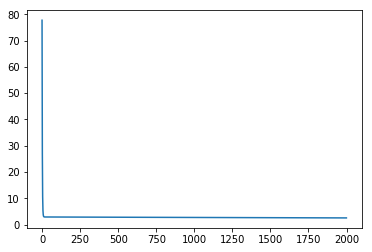

In [117]:
iters = np.arange(2000)
plt.plot(iters, cost_history)

<font color='red'>We can see, based on the initial weight=0,bias=0, learning_rate=0.0001,the cost value decrease sharply.</font>

Text(0, 0.5, 'sales')

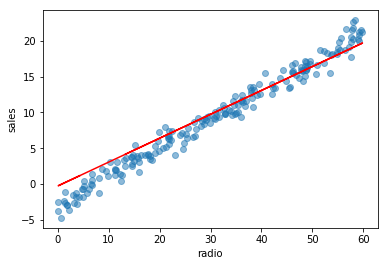

In [121]:
sales_predict = weight_final*radio_sample + bias_final
plt.scatter(radio_sample, sales_sample, alpha=0.5)
plt.plot(radio_sample, sales_predict, c="r")
plt.xlabel("radio")
plt.ylabel("sales")

## Experiment 2

In the last experiment, we set four hyperparameters manually which are w, b, l and i. Let's change them and see what happen.

In [153]:
weight_final, bias_final, cost_history = train(radio_sample, sales_sample, -1000, 0, 0.0001, 2000)

Iter: 0 	 Weight: -753.190221 	 Bias: 6.091610 	 Cost: 700169768.718390
Iter: 5 	 Weight: -182.698756 	 Bias: 20.168463 	 Cost: 41100789.097582
Iter: 10 	 Weight: -44.478396 	 Bias: 23.573870 	 Cost: 2412831.778656
Iter: 15 	 Weight: -10.989863 	 Bias: 24.393771 	 Cost: 141812.898689
Iter: 20 	 Weight: -2.876041 	 Bias: 24.587251 	 Cost: 8501.907289
Iter: 25 	 Weight: -0.910075 	 Bias: 24.628960 	 Cost: 676.341469
Iter: 30 	 Weight: -0.433628 	 Bias: 24.633899 	 Cost: 216.885960
Iter: 35 	 Weight: -0.318065 	 Bias: 24.629931 	 Cost: 189.827967
Iter: 40 	 Weight: -0.289939 	 Bias: 24.623806 	 Cost: 188.152151
Iter: 45 	 Weight: -0.282997 	 Bias: 24.617160 	 Cost: 187.966335
Iter: 50 	 Weight: -0.281188 	 Bias: 24.610389 	 Cost: 187.868027
Iter: 55 	 Weight: -0.280622 	 Bias: 24.603589 	 Cost: 187.774899
Iter: 60 	 Weight: -0.280358 	 Bias: 24.596783 	 Cost: 187.682118
Iter: 65 	 Weight: -0.280166 	 Bias: 24.589976 	 Cost: 187.589402
Iter: 70 	 Weight: -0.279993 	 Bias: 24.583172 	 Cost:

Iter: 880 	 Weight: -0.253319 	 Bias: 23.502779 	 Cost: 173.075888
Iter: 885 	 Weight: -0.253158 	 Bias: 23.496244 	 Cost: 172.990425
Iter: 890 	 Weight: -0.252997 	 Bias: 23.489710 	 Cost: 172.905004
Iter: 895 	 Weight: -0.252835 	 Bias: 23.483179 	 Cost: 172.819625
Iter: 900 	 Weight: -0.252674 	 Bias: 23.476648 	 Cost: 172.734289
Iter: 905 	 Weight: -0.252513 	 Bias: 23.470120 	 Cost: 172.648995
Iter: 910 	 Weight: -0.252352 	 Bias: 23.463593 	 Cost: 172.563744
Iter: 915 	 Weight: -0.252191 	 Bias: 23.457068 	 Cost: 172.478535
Iter: 920 	 Weight: -0.252030 	 Bias: 23.450544 	 Cost: 172.393368
Iter: 925 	 Weight: -0.251869 	 Bias: 23.444022 	 Cost: 172.308244
Iter: 930 	 Weight: -0.251708 	 Bias: 23.437501 	 Cost: 172.223161
Iter: 935 	 Weight: -0.251547 	 Bias: 23.430983 	 Cost: 172.138121
Iter: 940 	 Weight: -0.251386 	 Bias: 23.424465 	 Cost: 172.053124
Iter: 945 	 Weight: -0.251225 	 Bias: 23.417950 	 Cost: 171.968168
Iter: 950 	 Weight: -0.251064 	 Bias: 23.411436 	 Cost: 171.88

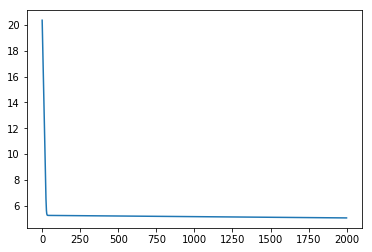

In [154]:
iters = np.arange(2000)
# because the derivation of cost is too large
# for visulazation, we need to shrink cost
cost_history = np.log(np.array(cost_history))
plt.plot(iters, cost_history)

Text(0, 0.5, 'sales')

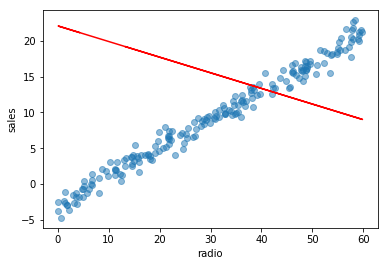

In [155]:
sales_predict = weight_final*radio_sample + bias_final
plt.scatter(radio_sample, sales_sample, alpha=0.5)
plt.plot(radio_sample, sales_predict, c="r")
plt.xlabel("radio")
plt.ylabel("sales")

# <font color='Blue'>Task 2</font>
Single feature ---> multiple features 

scalar ---> matrix(vector)


# Generate data

In [359]:
sample_size = 200
feature_size = 3
np.random.seed(5)
feature_sample = 50*np.random.rand(feature_size)*np.random.rand(sample_size, feature_size)

np.random.seed(123)
weight_sample = np.random.rand(feature_size).reshape(feature_size, 1)

np.random.seed(888)
noise = np.random.normal(0, 0.01, sample_size).reshape(sample_size ,1)

result_sample = np.dot(feature, weight) + noise


# Normalization

We want to shrink the data to reduce the time to change weight. There must be lots of tricks which is another topic.

In [325]:
def normalize(feature):
    #feature: sample size * feature size
    feature = feature.astype("float64")
    sample_size, feature_size = feature.shape
    for i in range(feature_size):
        fmean = np.mean(feature[:, i])
        frange = np.amax(feature[:, i]) - np.amin(feature[:, i])
        feature[:, i] = (feature[:, i] - fmean) / frange
    return feature

# Prediction format

For simplifing the problem, here we just think bias is zero.

$Y_{sample*1}=F_{sample*feature} \cdot W_{feature*1}$

In [355]:
def predict(features, weight):
    weight = weight.reshape(len(weight), 1)
    prediction = np.dot(features, weight)
    return prediction

# Cost function

$MSE=\frac{1}{2 N} \left\|Y_{target}-Y_{predict}\right\|_2^2$

In [354]:
def cost_function(features, targets, weight):
    #here weights should be (feature, 1)
    weight = weight.reshape(len(weight), 1)
    targets = targets.reshape(len(targets), 1)
    error = ((targets - predict(features, weight))**2).sum()
    return error/(2.0*len(targets))

# Gradient descent

Just the equation derived in the watermelon book(3.11)

In [370]:
def update_weight(features, targets, weight, learning_rate):
    weight = weight.reshape(len(weight), 1)
    targets = targets.reshape(len(targets), 1)
    gradient = np.dot(features.T, (predict(features, weight) - targets))
    gradient = gradient / len(targets)
    weight = weight - gradient*learning_rate
    return weight

# Training

In [376]:
def train(features, targets, weight, learning_rate, iters):
    cost_history = []
    for i in range(iters):
        weight = update_weight(features, targets, weight, learning_rate)
        cost = cost_function(features, targets, weight)
        cost_history.append(cost)
        if i % 5 == 0:
            print("Iter: %d \t \t Cost: %4f" %(i, cost))
    return weight, cost_history

# Model evaluation

In [377]:
weight_initial = np.array([0, 0, 0])
weight, cost_history = train(feature_sample, result_sample, weight_initial, 0.0001, 1000)

Iter: 0 	 	 Cost: 64.953149
Iter: 5 	 	 Cost: 33.915984
Iter: 10 	 	 Cost: 18.615390
Iter: 15 	 	 Cost: 11.053208
Iter: 20 	 	 Cost: 7.296763
Iter: 25 	 	 Cost: 5.412361
Iter: 30 	 	 Cost: 4.449195
Iter: 35 	 	 Cost: 3.939745
Iter: 40 	 	 Cost: 3.654115
Iter: 45 	 	 Cost: 3.479253
Iter: 50 	 	 Cost: 3.359556
Iter: 55 	 	 Cost: 3.267672
Iter: 60 	 	 Cost: 3.190135
Iter: 65 	 	 Cost: 3.120312
Iter: 70 	 	 Cost: 3.054928
Iter: 75 	 	 Cost: 2.992358
Iter: 80 	 	 Cost: 2.931792
Iter: 85 	 	 Cost: 2.872817
Iter: 90 	 	 Cost: 2.815220
Iter: 95 	 	 Cost: 2.758881
Iter: 100 	 	 Cost: 2.703732
Iter: 105 	 	 Cost: 2.649725
Iter: 110 	 	 Cost: 2.596827
Iter: 115 	 	 Cost: 2.545010
Iter: 120 	 	 Cost: 2.494250
Iter: 125 	 	 Cost: 2.444522
Iter: 130 	 	 Cost: 2.395806
Iter: 135 	 	 Cost: 2.348080
Iter: 140 	 	 Cost: 2.301324
Iter: 145 	 	 Cost: 2.255518
Iter: 150 	 	 Cost: 2.210643
Iter: 155 	 	 Cost: 2.166678
Iter: 160 	 	 Cost: 2.123606
Iter: 165 	 	 Cost: 2.081409
Iter: 170 	 	 Cost: 2.040067
Ite

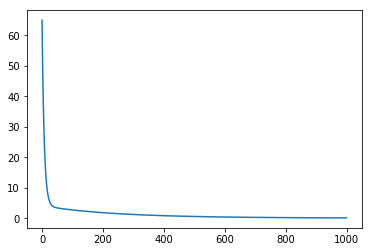

In [378]:
iters = np.arange(1000)
plt.plot(iters, cost_history)